In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
sample_sub = pd.read_csv('sample_submission.csv') 
sample_sub.head(10)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [10]:
dataset = pd.read_csv('train.csv')
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
dataset['LotFrontage'].fillna(method='ffill',inplace=True)

In [14]:
dataset['MasVnrArea'].fillna(0,inplace=True)

In [16]:
dataset['Electrical'].fillna(method='ffill',inplace=True)

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
dataset.fillna("NA",inplace=True)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	Not present

In [21]:
label_mapping = {"NA": 0, "Po": 1, "Fa": 2,"TA":3,"Gd":4,"Ex":5}

In [24]:
dataset.replace({"BsmtQual": label_mapping},inplace=True)

In [29]:
dataset.replace({"ExterCond": label_mapping,"ExterQual": label_mapping,"BsmtCond": label_mapping,"HeatingQC": label_mapping,"KitchenQual": label_mapping},inplace=True)

In [32]:
dataset.replace({"FireplaceQu": label_mapping,"GarageQual": label_mapping,"GarageCond": label_mapping,"PoolQC": label_mapping},inplace=True)

In [34]:
street_map = {"NA":0,"Grvl":1,"Pave":2}
dataset.replace({"Street":street_map,"Alley":street_map},inplace=True)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [36]:
dataset['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [42]:
LotShape_map = {"IR3":1,"IR2":2,"IR1":3,"Reg":4}
dataset.replace({"LotShape":LotShape_map},inplace=True)

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [45]:
dataset['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [47]:
LandContour = {"Low":1,"HLS":2,"Bnk":3,"Lvl":4}
dataset.replace({"LandContour":LandContour},inplace=True)

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [49]:
dataset['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [50]:
Utilities = {"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}
dataset.replace({"Utilities":Utilities},inplace=True)

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	

In [52]:
dataset['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [53]:
LotConfig = {"Inside":1,"Corner":2,"CulDSac":3,"FR2":4,"FR3":5}
dataset.replace({"LotConfig":LotConfig},inplace=True)

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	

In [56]:
dataset['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [57]:
LandSlope = {"Gtl":1,"Mod":2,"Sev":3}
dataset.replace({"LandSlope":LandSlope},inplace=True)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [65]:
dataset['Neighborhood']=le.fit_transform(dataset['Neighborhood'])

In [66]:
dataset['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [67]:
le2 = LabelEncoder()

In [69]:
le2.fit(dataset['Condition1'])

LabelEncoder()

In [70]:
le2.classes_

array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [71]:
dataset['Condition1']=le2.transform(dataset['Condition1'])

In [72]:
dataset['Condition2']=le2.transform(dataset['Condition2'])

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [74]:
dataset['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [75]:
le3 = LabelEncoder()
dataset['BldgType']=le3.fit_transform(dataset['BldgType'])

In [76]:
dataset['BldgType'].unique()

array([0, 1, 2, 4, 3])

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	

In [77]:
dataset['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [78]:
HouseStyle = {"1Story":1,"1.5Unf":2,"1.5Fin":3,"SFoyer":4,"SLvl":5,"2Story":6,"2.5Unf":7,"2.5Fin":8}

In [81]:
dataset.replace({"HouseStyle":HouseStyle},inplace=True)

In [83]:
le_roof=LabelEncoder()

In [84]:
dataset['RoofStyle'] = le_roof.fit_transform(dataset['RoofStyle'])

In [87]:
le_matl = LabelEncoder()
dataset['RoofMatl']=le_matl.fit_transform(dataset['RoofMatl'])

In [95]:
le_ext = LabelEncoder()
le_ext.fit(dataset['Exterior2nd'])

LabelEncoder()

In [99]:
dataset['Exterior1st'] = le_ext.transform(dataset['Exterior1st'])

In [97]:
dataset['Exterior2nd'] = le_ext.transform(dataset['Exterior2nd'])

In [98]:
le_ext.classes_

array(['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd',
       'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'Stone',
       'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'], dtype=object)

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [100]:
dataset['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NA'], dtype=object)

In [101]:
MasVnrType={"None":0,"NA":0,"BrkCmn":1,"BrkFace":2,"CBlock":3,"Stone":4}
dataset.replace({"MasVnrType":MasVnrType},inplace=True)

In [104]:
dataset['MasVnrType'].unique()

array([2, 0, 4, 1], dtype=int64)

In [107]:
le_f = LabelEncoder()
dataset['Foundation'] = le_f.fit_transform(dataset['Foundation'])

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [109]:
BsmtExposure = {"NA":0,"No":0,"Mn":1,"Av":2,"Gd":3}
dataset.replace({"BsmtExposure":BsmtExposure},inplace=True)

In [110]:
dataset['BsmtExposure'].unique()

array([0, 3, 1, 2], dtype=int64)

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

In [111]:
BsmtFinType= {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"NA":0}

In [112]:
dataset.replace({"BsmtFinType1":BsmtFinType,"BsmtFinType2":BsmtFinType},inplace=True)

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		

In [116]:
le_heat = LabelEncoder()
dataset['Heating'] = le_heat.fit_transform(dataset['Heating'])

In [118]:
dataset['CentralAir'] = le.fit_transform(dataset['CentralAir'])

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		

In [121]:
Electrical = {"FuseP":1,"FuseF":2,"FuseA":3,"Mix":4,"SBrkr":5}
dataset.replace({"Electrical":Electrical},inplace=True)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [123]:
Functional = {"Typ":8,"Min1":7,"Min2":6,"Mod":5,"Maj1":4,"Maj2":3,"Sev":2,"Sal":1}
dataset.replace({"Functional":Functional},inplace=True)

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		

In [125]:
GarageType = {"2Types":6,"Attchd":5,"Basment":4,"BuiltIn":3,"CarPort":2,"Detchd":1,"NA":0}
dataset.replace({"GarageType":GarageType},inplace=True)

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

In [126]:
GarageFinish = {"Fin":3,"RFn":2,"Unf":1,"NA":0}
dataset.replace({"GarageFinish":GarageFinish},inplace=True)

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		

In [127]:
PavedDrive = {"Y":1,"P":0.5,"N":0}
dataset.replace({"PavedDrive":PavedDrive},inplace=True)

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		

In [128]:
MiscFeature = {"Elev":5,"Gar2":4,"Othr":3,"Shed":2,"TenC":1,"NA":0}
dataset.replace({"MiscFeature":MiscFeature},inplace=True)

In [134]:
dataset.replace({"GarageYrBlt":{"NA":np.nan}},inplace=True)

In [136]:
dataset["GarageYrBlt"].fillna(method='ffill',inplace=True)

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	

In [139]:
Fence = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1,"NA":0}
dataset.replace({"Fence":Fence},inplace=True)

In [141]:
dataset['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [142]:
le_sale = LabelEncoder()
dataset['SaleType'] = le_sale.fit_transform(dataset['SaleType'])

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [144]:
le_sale = LabelEncoder()
dataset['SaleCondition'] = le_sale.fit_transform(dataset['SaleCondition'])

In [166]:
dataset['SoldTime']

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1455   2007-08-01
1456   2010-02-01
1457   2010-05-01
1458   2010-04-01
1459   2008-06-01
Name: SoldTime, Length: 1460, dtype: datetime64[ns]

In [161]:
dataset['DaySold'] = np.ones((1460,1))

In [163]:
df = dataset[["YrSold", "MoSold", "DaySold"]].copy()
df.columns= ["year", "month", "day"]

In [165]:
dataset['SoldTime']=pd.to_datetime(df) #This won't help much would have to anyways separate it out

In [171]:
X = dataset.drop(['Id','SalePrice','SoldTime','DaySold'],axis=1)

In [172]:
y = dataset['SalePrice']

In [173]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [174]:
X.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,2,0,4,4,4,1,...,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,2,0,4,4,4,4,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,2,0,3,4,4,1,...,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,2,0,3,4,4,2,...,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,2,0,3,4,4,4,...,0,0,0,0,0,0,12,2008,8,4
5,50,3,85.0,14115,2,0,3,4,4,1,...,0,0,0,3,2,700,10,2009,8,4
6,20,3,75.0,10084,2,0,4,4,4,1,...,0,0,0,0,0,0,8,2007,8,4
7,60,3,75.0,10382,2,0,3,4,4,2,...,0,0,0,0,2,350,11,2009,8,4
8,50,4,51.0,6120,2,0,4,4,4,1,...,0,0,0,0,0,0,4,2008,8,0
9,190,3,50.0,7420,2,0,4,4,4,2,...,0,0,0,0,0,0,1,2008,8,4


In [177]:
corr = X.corr()

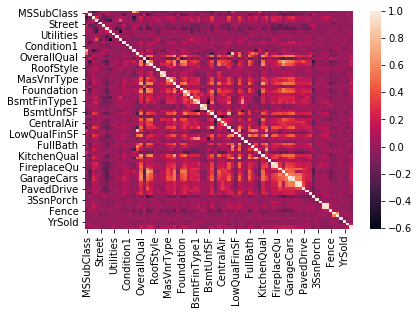

In [180]:
sns.heatmap(corr)#will first proceed with all the features as very few seem to be highly correlated

In [181]:
from sklearn.linear_model import Lasso #Will first Try out with Lasso Regression
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [193]:
clf = Lasso(alpha=0.1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,y_pred)

0.06174208903409638

In [195]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8416583140406982

In [197]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit(X_train,y_train)
y_pred = SGD.predict(X_test)

In [198]:
mean_squared_log_error(y_test,y_pred)

0.0373554774172561

In [199]:
r2_score(y_test,y_pred)

0.8240943002693804

In [200]:
from sklearn.ensemble import RandomForestRegressor #till now the best model
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [201]:
mean_squared_log_error(y_test,y_pred)

0.019913663316594128

In [202]:
r2_score(y_test,y_pred)

0.9018400888549046

In [206]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [207]:
mean_squared_log_error(y_test,y_pred)

0.06208320913211295

In [208]:
r2_score(y_test,y_pred)

0.8419916279384856

In [209]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred = etr.predict(X_test)

In [210]:
mean_squared_log_error(y_test,y_pred)

0.02264552349216777

In [211]:
r2_score(y_test,y_pred)

0.8707771979328395

In [213]:
classifier = RandomForestRegressor()#Fitting the train data
X_scaled = scaler.fit_transform(X)
classifier.fit(X_scaled,y)

RandomForestRegressor()

In [270]:
test = pd.read_csv('test.csv')#loading the test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [271]:
test['LotFrontage'].fillna(method='ffill',inplace=True)
test['MasVnrArea'].fillna(0,inplace=True)
test['Electrical'].fillna(method='ffill',inplace=True)
test.fillna("NA",inplace=True)
label_mapping = {"NA": 0, "Po": 1, "Fa": 2,"TA":3,"Gd":4,"Ex":5}
test.replace({"BsmtQual": label_mapping},inplace=True)
test.replace({"ExterCond": label_mapping,"ExterQual": label_mapping,"BsmtCond": label_mapping,"HeatingQC": label_mapping,"KitchenQual": label_mapping},inplace=True)
test.replace({"FireplaceQu": label_mapping,"GarageQual": label_mapping,"GarageCond": label_mapping,"PoolQC": label_mapping},inplace=True)
street_map = {"NA":0,"Grvl":1,"Pave":2}
test.replace({"Street":street_map,"Alley":street_map},inplace=True)
LotShape_map = {"IR3":1,"IR2":2,"IR1":3,"Reg":4}
test.replace({"LotShape":LotShape_map},inplace=True)
LandContour = {"Low":1,"HLS":2,"Bnk":3,"Lvl":4}
test.replace({"LandContour":LandContour},inplace=True)
Utilities = {"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}
test.replace({"Utilities":Utilities},inplace=True)
LotConfig = {"Inside":1,"Corner":2,"CulDSac":3,"FR2":4,"FR3":5}
test.replace({"LotConfig":LotConfig},inplace=True)
LandSlope = {"Gtl":1,"Mod":2,"Sev":3}
test.replace({"LandSlope":LandSlope},inplace=True)
le = LabelEncoder()
test['Neighborhood']=le.fit_transform(test['Neighborhood'])
le2 = LabelEncoder()
le2.fit(test['Condition1'])
test['Condition1']=le2.transform(test['Condition1'])
test['Condition2']=le2.transform(test['Condition2'])
le3 = LabelEncoder()
test['BldgType']=le3.fit_transform(test['BldgType'])
HouseStyle = {"1Story":1,"1.5Unf":2,"1.5Fin":3,"SFoyer":4,"SLvl":5,"2Story":6,"2.5Unf":7,"2.5Fin":8}
test.replace({"HouseStyle":HouseStyle},inplace=True)
le_roof=LabelEncoder()
test['RoofStyle'] = le_roof.fit_transform(test['RoofStyle'])
le_matl = LabelEncoder()
test['RoofMatl']=le_matl.fit_transform(test['RoofMatl'])
le_ext1 = LabelEncoder()
le_ext2 = LabelEncoder()
test['Exterior1st'] = le_ext1.fit_transform(test['Exterior1st'])
test['Exterior2nd'] = le_ext2.fit_transform(test['Exterior2nd'])
MasVnrType={"None":0,"NA":0,"BrkCmn":1,"BrkFace":2,"CBlock":3,"Stone":4}
test.replace({"MasVnrType":MasVnrType},inplace=True)
le_f = LabelEncoder()
test['Foundation'] = le_f.fit_transform(test['Foundation'])
BsmtExposure = {"NA":0,"No":0,"Mn":1,"Av":2,"Gd":3}
test.replace({"BsmtExposure":BsmtExposure},inplace=True)
BsmtFinType= {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"NA":0}
test.replace({"BsmtFinType1":BsmtFinType,"BsmtFinType2":BsmtFinType},inplace=True)
le_heat = LabelEncoder()
test['Heating'] = le_heat.fit_transform(test['Heating'])
test['CentralAir'] = le.fit_transform(test['CentralAir'])
Electrical = {"FuseP":1,"FuseF":2,"FuseA":3,"Mix":4,"SBrkr":5}
test.replace({"Electrical":Electrical},inplace=True)
Functional = {"Typ":8,"Min1":7,"Min2":6,"Mod":5,"Maj1":4,"Maj2":3,"Sev":2,"Sal":1}
test.replace({"Functional":Functional},inplace=True)
GarageType = {"2Types":6,"Attchd":5,"Basment":4,"BuiltIn":3,"CarPort":2,"Detchd":1,"NA":0}
test.replace({"GarageType":GarageType},inplace=True)
GarageFinish = {"Fin":3,"RFn":2,"Unf":1,"NA":0}
test.replace({"GarageFinish":GarageFinish},inplace=True)
PavedDrive = {"Y":1,"P":0.5,"N":0}
test.replace({"PavedDrive":PavedDrive},inplace=True)
MiscFeature = {"Elev":5,"Gar2":4,"Othr":3,"Shed":2,"TenC":1,"NA":0}
test.replace({"MiscFeature":MiscFeature},inplace=True)
test.replace({"GarageYrBlt":{"NA":np.nan}},inplace=True)
test["GarageYrBlt"].fillna(method='ffill',inplace=True)
Fence = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1,"NA":0}
test.replace({"Fence":Fence},inplace=True)
le_sale = LabelEncoder()
test['SaleType'] = le_sale.fit_transform(test['SaleType'])
le_sale2 = LabelEncoder()
test['SaleCondition'] = le_sale2.fit_transform(test['SaleCondition'])

In [272]:
test.replace({"Utilities":{"NA":np.nan}},inplace=True)
test['Utilities'].fillna(method='ffill',inplace=True)

In [273]:
test['MSZoning']=le_Zone.fit_transform(test['MSZoning'])

In [274]:
test.replace({"BsmtFinSF1":{"NA":np.nan},"BsmtFinSF2":{"NA":np.nan},"BsmtUnfSF":{"NA":np.nan},"TotalBsmtSF":{"NA":np.nan}},inplace=True)
test[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].fillna(method='ffill',inplace=True)

In [275]:
test.replace({"BsmtHalfBath":{"NA":np.nan},"BsmtFullBath":{"NA":np.nan},"Functional":{"NA":np.nan},"GarageCars":{"NA":np.nan},"GarageArea":{"NA":np.nan}},inplace=True)
test[['BsmtHalfBath','BsmtFullBath','Functional','GarageCars','GarageArea']].fillna(method='ffill',inplace=True)

In [276]:
id_test = test['Id'].copy()
test.drop(['Id'],axis=1,inplace=True)

In [297]:
test['Functional'].fillna(method='ffill',inplace=True)

In [287]:
test['BsmtHalfBath'].fillna(method='ffill',inplace=True)

In [289]:
test['BsmtFullBath'].fillna(method='ffill',inplace=True)

In [291]:
test['BsmtFinSF1'].fillna(method='ffill',inplace=True)

In [292]:
test['BsmtFinSF2'].fillna(method='ffill',inplace=True)

In [293]:
test['BsmtUnfSF'].fillna(method='ffill',inplace=True)

In [294]:
test['TotalBsmtSF'].fillna(method='ffill',inplace=True)

In [299]:
test['GarageCars'].fillna(method='ffill',inplace=True)

In [300]:
test['GarageArea'].fillna(method='ffill',inplace=True)

In [302]:
X_test = scaler.transform(test)

In [279]:
X = dataset.drop(['Id','SalePrice','SoldTime','DaySold'],axis=1)

In [280]:
classifier = RandomForestRegressor()#Fitting the train data
X_scaled = scaler.fit_transform(X)
classifier.fit(X_scaled,y)

RandomForestRegressor()

In [304]:
y_pred_test = classifier.predict(X_test)

In [305]:
y_pred_test

array([125106.24, 155015.5 , 178684.  , ..., 149926.87, 114647.1 ,
       218672.14])

In [307]:
submit1 = pd.DataFrame(id_test,columns={'Id'})

In [308]:
submit1['SalePrice']=y_pred_test

In [309]:
submit1.head(10)

,Id,SalePrice
0,1461,125106.24
1,1462,155015.50
2,1463,178684.00
3,1464,179261.74
4,1465,200298.53
5,1466,176735.40
6,1467,167323.36
7,1468,171613.22
8,1469,179083.21
9,1470,119403.30


In [310]:
submit1.to_csv('submit1.csv',index=False)